In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data  (num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.6106 - accuracy: 0.5542 - val_loss: 1.7220 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.3921 - accuracy: 0.7151 - val_loss: 1.2802 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0293 - accuracy: 0.7816 - val_loss: 1.1051 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8056 - accuracy: 0.8276 - val_loss: 1.0151 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6434 - accuracy: 0.8634 - val_loss: 0.9594 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5164 - accuracy: 0.8915 - val_loss: 0.9236 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4175 - accuracy: 0.9109 - val_loss: 0.8758 - val_accuracy: 0.8200
Epoch 8/20
16

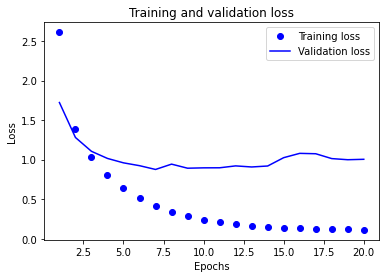

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 61ms/step - loss: 2.4679 - accuracy: 0.5190 - val_loss: 1.6088 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 1s 59ms/step - loss: 1.3409 - accuracy: 0.7175 - val_loss: 1.2396 - val_accuracy: 0.7390
Epoch 3/9
16/16 [==============================] - 1s 89ms/step - loss: 0.9997 - accuracy: 0.7893 - val_loss: 1.1098 - val_accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 2s 97ms/step - loss: 0.7850 - accuracy: 0.8330 - val_loss: 1.0311 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 2s 98ms/step - loss: 0.6276 - accuracy: 0.8623 - val_loss: 0.9406 - val_accuracy: 0.8110
Epoch 6/9
16/16 [==============================] - 1s 95ms/step - loss: 0.5025 - accuracy: 0.8934 - val_loss: 0.9028 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 1s 79ms/step - loss: 0.4044 - accuracy: 0.9147 - val_loss: 0.8779 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===